##**1. Import Library**

In [1]:
# install category encoders
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.1 MB/s eta 0:00:00


In [2]:
# Common library used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Encoder
import category_encoders as ce
from category_encoders import TargetEncoder
from sklearn.preprocessing import OrdinalEncoder

# Imbalanced Dataset
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTENC, SMOTE

#Preprocessing ML
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler,OneHotEncoder,StandardScaler,FunctionTransformer,LabelEncoder
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.model_selection import cross_validate,cross_val_predict,cross_val_score,ShuffleSplit,StratifiedKFold,RepeatedStratifiedKFold
from sklearn.feature_selection import RFE, SelectPercentile
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

#metrics evaluation
from sklearn.metrics import make_scorer, f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve, auc

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

##**2. Load Dataset**

In [3]:
# load dataset from google drive storage
df = pd.read_csv('/content/drive/MyDrive/4.Data Science Course/Personal Project/Student Performance in Exam/clean_dataset.csv')
df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,passing_score
0,female,group B,bachelor's degree,standard,none,72,72,74,not_passed
1,female,group C,some college,standard,completed,69,90,88,passed
2,female,group B,master's degree,standard,none,90,95,93,passed
3,male,group A,associate's degree,free/reduced,none,47,57,44,not_passed
4,male,group C,some college,standard,none,76,78,75,passed
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,passed
996,male,group C,high school,free/reduced,none,62,55,55,not_passed
997,female,group C,high school,free/reduced,completed,59,71,65,not_passed
998,female,group D,some college,standard,completed,68,78,77,not_passed


In [4]:
# check missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
passing_score                  0
dtype: int64

In [5]:
# check duplicated values
df.duplicated().sum()

0

##**3. Feature Engineering**

###**b. Data Encoding**

In [6]:
# copy previous dataframe
df_fe = df.copy()
df_fe

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,passing_score
0,female,group B,bachelor's degree,standard,none,72,72,74,not_passed
1,female,group C,some college,standard,completed,69,90,88,passed
2,female,group B,master's degree,standard,none,90,95,93,passed
3,male,group A,associate's degree,free/reduced,none,47,57,44,not_passed
4,male,group C,some college,standard,none,76,78,75,passed
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,passed
996,male,group C,high school,free/reduced,none,62,55,55,not_passed
997,female,group C,high school,free/reduced,completed,59,71,65,not_passed
998,female,group D,some college,standard,completed,68,78,77,not_passed


In [7]:
# list of columns according to data type
cat_feats = [cols for cols in df_fe.columns if (df_fe[cols].dtype=='O') and (cols != 'parental_level_of_education') and (cols != 'passing_score')]
num_feats = [cols for cols in df_fe.columns if (df_fe[cols].dtype=='int64') or (df_fe[cols].dtype=='float64')]
ord_feats = ['parental_level_of_education']
label = ['passing_score']

In [8]:
# Inisialisasi objek LabelEncoder
le = LabelEncoder()

# Melakukan encoding label pada kolom 'passing_score'
df_fe['passing_score'] = le.fit_transform(df_fe['passing_score'])

In [9]:
# mapping ordinal feature
ordinal_mapping = [
    {'col': 'parental_level_of_education',
    'mapping': {'some high school':0, 'high school':1,
                'some college':2, "associate's degree":3,
                "bachelor's degree":4, "master's degree":5}}]


In [10]:
# encoding ordinal features with OrdinalEncoder
ord_encoder = ce.OrdinalEncoder(cols=ord_feats, mapping=ordinal_mapping)
df_fe = ord_encoder.fit_transform(df_fe)

In [11]:
# encoding categorical features with TargetEncoder
encoder = TargetEncoder()
df_fe[cat_feats] = encoder.fit_transform(df_fe[cat_feats], df_fe['passing_score'])

In [12]:
# check dataframe after encoding
df_fe

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,passing_score
0,0.366795,0.294737,4,0.386047,0.253894,72,72,74,0
1,0.366795,0.294671,2,0.386047,0.449721,69,90,88,1
2,0.366795,0.294737,5,0.386047,0.253894,90,95,93,1
3,0.278008,0.213594,3,0.211268,0.253894,47,57,44,0
4,0.278008,0.294671,2,0.386047,0.253894,76,78,75,1
...,...,...,...,...,...,...,...,...,...
995,0.366795,0.471428,5,0.386047,0.449721,88,99,95,1
996,0.278008,0.294671,1,0.211268,0.253894,62,55,55,0
997,0.366795,0.294671,1,0.211268,0.449721,59,71,65,0
998,0.366795,0.339695,2,0.386047,0.449721,68,78,77,0


###**b. Features Selection**

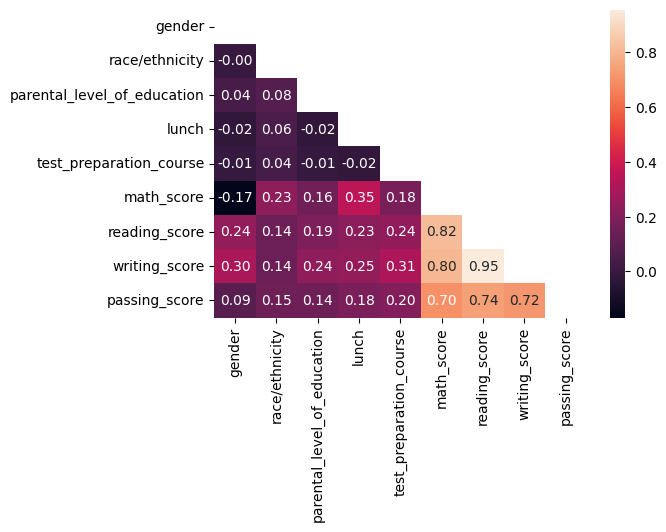

In [13]:
# check correlation all features with heatmap
corr_ = df_fe.corr()
plt.figure(figsize=(6,4))
mask = np.triu(np.ones_like(corr_, dtype=bool))
sns.heatmap(df_fe.corr(), annot=True, fmt='.2f', mask=mask)
plt.show()


In [26]:
def calculate_VIF(data):
    X = sm.add_constant(data.iloc[:,:-1])
    vif_data = pd.DataFrame([variance_inflation_factor(X.values, i)
                        for i in range(len(X.columns))],
                        index = X.columns).reset_index()
    vif_data.columns = ['feature','VIF']
    vif_data = vif_data.loc[vif_data.feature!='const']

    return(vif_data)

In [27]:
calculate_VIF(df_fe)

,feature,VIF
1,gender,2.660109
2,race/ethnicity,1.100778
3,parental_level_of_education,1.123016
4,lunch,1.195874
5,test_preparation_course,1.307134
6,math_score,7.881132
7,reading_score,13.151739
8,writing_score,17.733742


##**4. Modeling**

In [51]:
# check dataframe
df_mod = df.copy()
df_mod

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,passing_score
0,female,group B,bachelor's degree,standard,none,72,72,74,not_passed
1,female,group C,some college,standard,completed,69,90,88,passed
2,female,group B,master's degree,standard,none,90,95,93,passed
3,male,group A,associate's degree,free/reduced,none,47,57,44,not_passed
4,male,group C,some college,standard,none,76,78,75,passed
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,passed
996,male,group C,high school,free/reduced,none,62,55,55,not_passed
997,female,group C,high school,free/reduced,completed,59,71,65,not_passed
998,female,group D,some college,standard,completed,68,78,77,not_passed


###**a. Split Train & Test**

In [ ]:
# Inisialisasi objek LabelEncoder
le = LabelEncoder()

# Melakukan encoding label pada kolom 'passing_score'
df_mod['passing_score'] = le.fit_transform(df_mod['passing_score'])

In [ ]:
# split dataset
from sklearn.model_selection import train_test_split

X = df_mod.drop(columns=['passing_score'])
y = df_mod['passing_score']

#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size= 0.20, random_state= 42)

In [ ]:
# check sample after split
for x in [X_train, y_train, X_test, y_test]:
    print(x.shape)

(800, 8)
(800,)
(200, 8)
(200,)


###**b. Pipeline**

In [ ]:
# define categorical, numerical, and ordinal columns
categorical_feature = ['gender', 'race/ethnicity', 'lunch', 'test_preparation_course']
numerical_feature = ['math_score', 'reading_score', 'writing_score']
ordinal_feature = ['parental_level_of_education']

In [ ]:
# mapping ordinal feature
ordinal_mapping = [
    {'col': 'parental_level_of_education',
    'mapping': {'some high school':0, 'high school':1,
                'some college':2, "associate's degree":3,
                "bachelor's degree":4, "master's degree":5}}]

# encoding ordinal features with OrdinalEncoder
ord_encoder = ce.OrdinalEncoder(cols=ordinal_feature, mapping=ordinal_mapping)

In [ ]:
# use ColumnTransformer to encode features for pipeline purposes
preprocessor = ColumnTransformer(
      transformers=[('categorical', TargetEncoder(), categorical_feature),
                    ('numerical', RobustScaler(), numerical_feature),
                    ('ordinal', ord_encoder, ordinal_feature)])

In [ ]:
set_config(display='diagram')

###**c. Modeling**

In [ ]:
# define the ml algoritms
logreg = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
svc = SVC(random_state=42)

In [ ]:
# define the metrics evaluation
metrics = ['roc_auc','f1_micro', 'recall', 'average_precision']

In [ ]:
# create empty list for save result after cross validation
models = []
scores = []

In [ ]:
ml_models = [logreg, dt, rf, xgb, svc]

for i in ml_models:
    skfold=StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    estimator=Pipeline([
            ('preprocessor', preprocessor),
            ('resampling', SMOTE(random_state=42)),
            ('model',i)])
    estimator.fit(X_train, y_train)

    cross_val = cross_validate(estimator,
                               X_train, y_train,
                               cv=skfold,
                               scoring= metrics,
                               n_jobs=-1)
    models.append(f'{i.__class__.__name__}')
    scores.append(list(cross_val.values())[2:])

####**- Benchmark Model**

In [ ]:
df_models = pd.DataFrame([[scores[i][j].mean() for j in range(len(metrics))] for i in range(len(models))],
                         index=models,
                         columns=metrics).sort_values('average_precision', ascending=False)

df_models

,roc_auc,f1_micro,recall,average_precision
LogisticRegression,0.999929,0.98250,1.000000,0.999858
SVC,0.999501,0.97250,1.000000,0.998989
XGBClassifier,0.998715,0.97875,0.965385,0.997433
RandomForestClassifier,0.998498,0.97875,0.973077,0.997029
DecisionTreeClassifier,0.967675,0.97125,0.957538,0.928416


###**d. Hyperparameter Tuning**

In [ ]:
fine_tuned_models = []
tuned_models = ['RandomForestClassifierTuned', 'XGBClassifierTuned']
tuned_scores = []

In [ ]:
%%time
# define the parameters for random forest model's tuned
rfr_params = {
    'forest__n_estimators': list(np.arange(10, 300)),
    'forest__max_depth': list(np.arange(1, 20)),
    'forest__min_samples_split': [2, 5, 10],
    'forest__min_samples_leaf': [1, 2, 3, 4, 5],
    'forest__max_features': ['auto', 'sqrt'],
    'forest__bootstrap': [True, False],
    'forest__criterion': ["gini", "entropy"]
}

Random_Forest_tuned = RandomForestClassifier(random_state=42, class_weight='balanced')
forest_pipe_tuned = Pipeline([
    ('preprocessor',preprocessor),
    ('resampling', SMOTE(random_state=42)),
    ('forest',Random_Forest_tuned)])
forest_pipe_tuned.fit(X_train, y_train)

forest_cv = RandomizedSearchCV(forest_pipe_tuned,
                               rfr_params,
                               scoring=metrics,
                               refit='average_precision',
                               error_score='raise',
                               n_jobs=-1,
                               verbose=1,
                               cv=skfold)
forest_cv.fit(X_train, y_train)
print(forest_cv.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'forest__n_estimators': 261, 'forest__min_samples_split': 2, 'forest__min_samples_leaf': 4, 'forest__max_features': 'sqrt', 'forest__max_depth': 16, 'forest__criterion': 'entropy', 'forest__bootstrap': False}
CPU times: user 2.06 s, sys: 62.3 ms, total: 2.12 s
Wall time: 53.9 s


In [ ]:
%%time
# Define the parameters for XGBoost tuned
xgb_params = {
    'xgb__n_estimators': [100, 200, 250, 400, 500],
    'xgb__max_depth': [5, 10, 15, 20],
    'xgb__learning_rate': [0.05, 0.01, 0.1],
    'xgb__subsample': [0.5, 1],
    'xgb__colsample_bytree': [0.8, 0.9],
    'xgb__min_child_weight': [1],
    'xgb__gamma': [i/10.0 for i in range(0, 6)],
    'xgb__reg_lambda': [0, 0.5, 1, 1.5, 2, 3, 4.5]
}

XGBoost_tuned = XGBClassifier(random_state=42)
xgb_pipe_tuned = Pipeline([
    ('preprocessor',preprocessor),
    ('resampling', SMOTE(random_state=42)),
    ('xgb',XGBoost_tuned)])
xgb_pipe_tuned.fit(X_train, y_train)

xgb_cv = RandomizedSearchCV(xgb_pipe_tuned,
                               xgb_params,
                               scoring=metrics,
                               refit='average_precision',
                               error_score='raise',
                               n_jobs=-1,
                               verbose=1,
                               cv=skfold)
xgb_cv.fit(X_train, y_train)
print(xgb_cv.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'xgb__subsample': 0.5, 'xgb__reg_lambda': 3, 'xgb__n_estimators': 200, 'xgb__min_child_weight': 1, 'xgb__max_depth': 15, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0.1, 'xgb__colsample_bytree': 0.9}
CPU times: user 3.97 s, sys: 47.2 ms, total: 4.01 s
Wall time: 30.9 s


###**e. Evaluation Metrics**

In [ ]:
fine_tuned_models.append(forest_cv.best_estimator_)
fine_tuned_models.append(xgb_cv.best_estimator_)

for i in fine_tuned_models:
    cross_val = cross_validate(i, X_train, y_train, cv= skfold, scoring = metrics)
    tuned_scores.append(list(cross_val.values())[2:])

data = []
for i in range(len(fine_tuned_models)):
    for j in range(len(metrics)):
        data.append(tuned_scores[i][j].mean())

reshaped_data = np.reshape(data, (len(fine_tuned_models), len(metrics)))

df_models = pd.DataFrame(reshaped_data, index = tuned_models, columns = metrics)
df_models = df_models.sort_values('average_precision', ascending=False)
df_models

,roc_auc,f1_micro,recall,average_precision
XGBClassifierTuned,0.999215,0.98000,0.969231,0.998411
RandomForestClassifierTuned,0.998783,0.97625,0.973077,0.997494


In [ ]:
xgb_tuned = xgb_cv.best_estimator_
forest_tuned = forest_cv.best_estimator_

In [ ]:
def pr_auc_plot(model, X_test, y_test):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    pr_auc = auc(recall, precision)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', label='PR Curve (AUC = %0.2f)' % pr_auc)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.show()

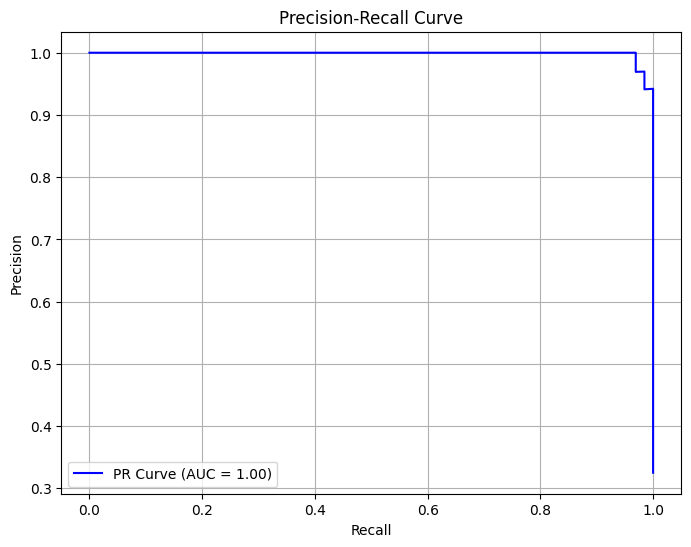

In [ ]:
pr_auc_plot(forest_tuned, X_test, y_test)

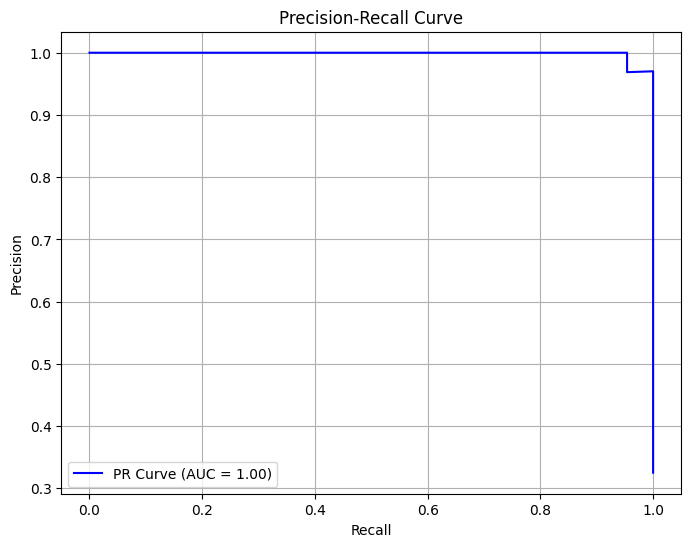

In [ ]:
pr_auc_plot(xgb_tuned, X_test, y_test)

##**5.Deployment**

###**a. Save Best Model ML with pickle**

In [ ]:
import pickle

In [ ]:
pickle.dump(xgb_tuned,open('xgb_fix_tuned.pkl','wb'))

###**b.Load Best Model ML for Model Inference**

In [ ]:
model = pickle.load(open('xgb_fix_tuned.pkl','rb'))
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  TargetEncoder(),
                                                  ['gender', 'race/ethnicity',
                                                   'lunch',
                                                   'test_preparation_course']),
                                                 ('numerical', RobustScaler(),
                                                  ['math_score',
                                                   'reading_score',
                                                   'writing_score']),
                                                 ('ordinal',
                                                  OrdinalEncoder(cols=['parental_level_of_education'],
                                                                 mapping=[{'col': 'parental_level_of_education',
                                                                           'data_t...
                               feature_types=None, gamma=0.1, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=15, max_leaves=None,
                               min_child_weight=1, missing=nan,
                               monotone_constraints=None, n_estimators=200,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=42, ...))])

In [ ]:
new_data = [{'gender': 'male',
             'race/ethnicity': 'group A',
             'parental_level_of_education': 'high school',
             'lunch':'free/reduced',
             'test_preparation_course': 'none',
             'math_score': 75,
             'reading_score': 90,
             'writing_score': 70}
             ]

data_testing1= pd.DataFrame(new_data,index=[0])
data_testing1

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,group A,high school,free/reduced,none,75,90,70


In [ ]:
pred = model.predict(data_testing1)

In [ ]:
def prediction(pred):
    if pred[0]==0:
        return "Passing Score = Not Passed"
    else:
        return "Passing Score = Passed"

In [ ]:
prediction(pred)

'Passing Score = Passed'

##**6. Conclusion**

>Evaluasi Model:
- Karena menggunakan small dataset, model dapat dengan mudah memprediksi label/target binary class (0: not passed, 1: passed).
- Tantangannya disini yaitu kita juga menangani imbalance dataset, yang kebanyakan kasus perlu ditangani menggunakan teknik resampling baik SMOTE atau class weight agar tidak menimbulkan bias bagi model saat memprediksi label/target.
- Metrik evaluasi yang cocok digunakan yaitu f1_score, recall, atau pr-auc karena lebih sensitif terhadap kelas minoritas, sebab sampel data yang tidak seimbang antar kelas pada label (imbalance dataset).
- Berdasarkan hasil benchmark model, model dengan skor average precision (pr-auc) dengan rata-rata paling tinggi yaitu model Logistic Regression (LogReg).
- Disini kita memilih model Random Forest Classifier dan XGBpost Classifier,  karena kedua model ini tahan terhadap multikolinearitas  dan tidak memerlukan asumsi linearitas dalam sebuah korelasi antara fitur dengan label.
- Walaupun demikian, semua model ML yang ada menunjukan performa yang sangat baik jika dilihat dari rata-rata skor average precision (> 0.90).  Faktor Bias-Variance Tradeoff juga perlu diperhatikan saat kita ingin membangun machine learning .
>
>Implementasi Model:
- Model ini dapat digunakan sebagai support sistem bagi para guru atau penyedia layanan tes SAT untuk dapat memprediksi secara otomatis apakah siswa dapat dinyatakan lulus atau tidak dalam tes SAT.
- Model ini lebih efektif dan efisien untuk diterapkan kedalam sistem website atau server/cloud computing agar dapat merekam pendataan siswa yang secara masif dan cepat tanpa memerlukan pengawasan dan penginputan data secara manual.
>
>Rekomendasi:
- Model dapat dikembangkan dengan menambahkan/menggunakan dataset yang lebih kompleks fitur dan besar jumlahnya, sehingga model dapat lebih beradapatasi dengan kompleksitas untuk memprediksi label/target secara lebih expert lagi.
